This includes GPT-4 code generated outputs, all the 6 tasks are executed here.

In [1]:
# Step 1: Upload file
from google.colab import files
uploaded = files.upload()


# Step 2: Load the uploaded CSV file using pandas
import pandas as pd

# Automatically detects the uploaded filename
df = pd.read_csv('diabetes.csv')

# Step 3: Display the first five rows
print("First five rows of the dataset:")
print(df.head())

# Step 4: Print shape and column names
print("\nShape of the DataFrame:", df.shape)
print("Column names:", df.columns.tolist())

Saving diabetes.csv to diabetes.csv
First five rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Shape of the DataFrame: (768, 9)
Column names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [2]:
# Step 1: Detect and print the number of missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())

# Step 2: Drop rows with any missing values
before_dropna = df.shape[0]
df = df.dropna()
after_dropna = df.shape[0]

# Step 3: Remove duplicate rows and report how many were removed
before_dedup = df.shape[0]
df = df.drop_duplicates()
after_dedup = df.shape[0]
rows_removed = before_dedup - after_dedup

print(f"\nRows removed due to missing values: {before_dropna - after_dropna}")
print(f"Rows removed as duplicates: {rows_removed}")

# Step 4: Print the final shape of the cleaned DataFrame
print("\nShape of the cleaned DataFrame:", df.shape)


Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Rows removed due to missing values: 0
Rows removed as duplicates: 0

Shape of the cleaned DataFrame: (768, 9)


In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Encode the 'Outcome' column using LabelEncoder
label_encoder = LabelEncoder()
df['Outcome'] = label_encoder.fit_transform(df['Outcome'])

# Step 2: Apply StandardScaler to all numeric columns except 'Outcome'
features_to_scale = df.drop(columns=['Outcome'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Create a new DataFrame for the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# Add the encoded Outcome column back
scaled_df['Outcome'] = df['Outcome']

# Step 3: Display the transformed DataFrame
print("Transformed DataFrame (first 5 rows):")
print(scaled_df.head())


Transformed DataFrame (first 5 rows):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# Step 1: Encode 'Outcome' and scale the features
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
df['Outcome'] = label_encoder.fit_transform(df['Outcome'])

features = df.drop(columns=['Outcome'])
target = df['Outcome']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 2: Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, target, test_size=0.2, random_state=42
)

# Step 3: Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 4: Print model parameters and confirm training
print("Model Parameters:")
print(clf.get_params())
print("\nTraining completed successfully.")


Model Parameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}

Training completed successfully.


In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Make predictions on the test set
y_pred = clf.predict(X_test)

# Step 2: Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Step 3: Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Step 4: Print classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Accuracy Score: 0.7468

Confusion Matrix:
[[75 24]
 [15 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



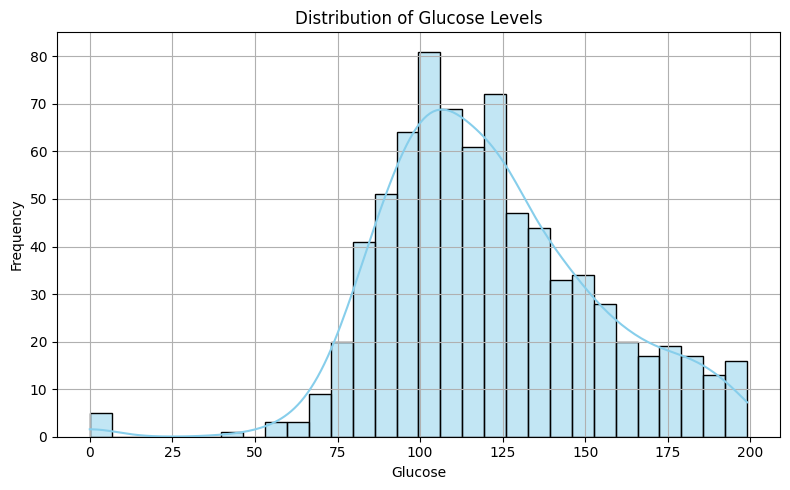

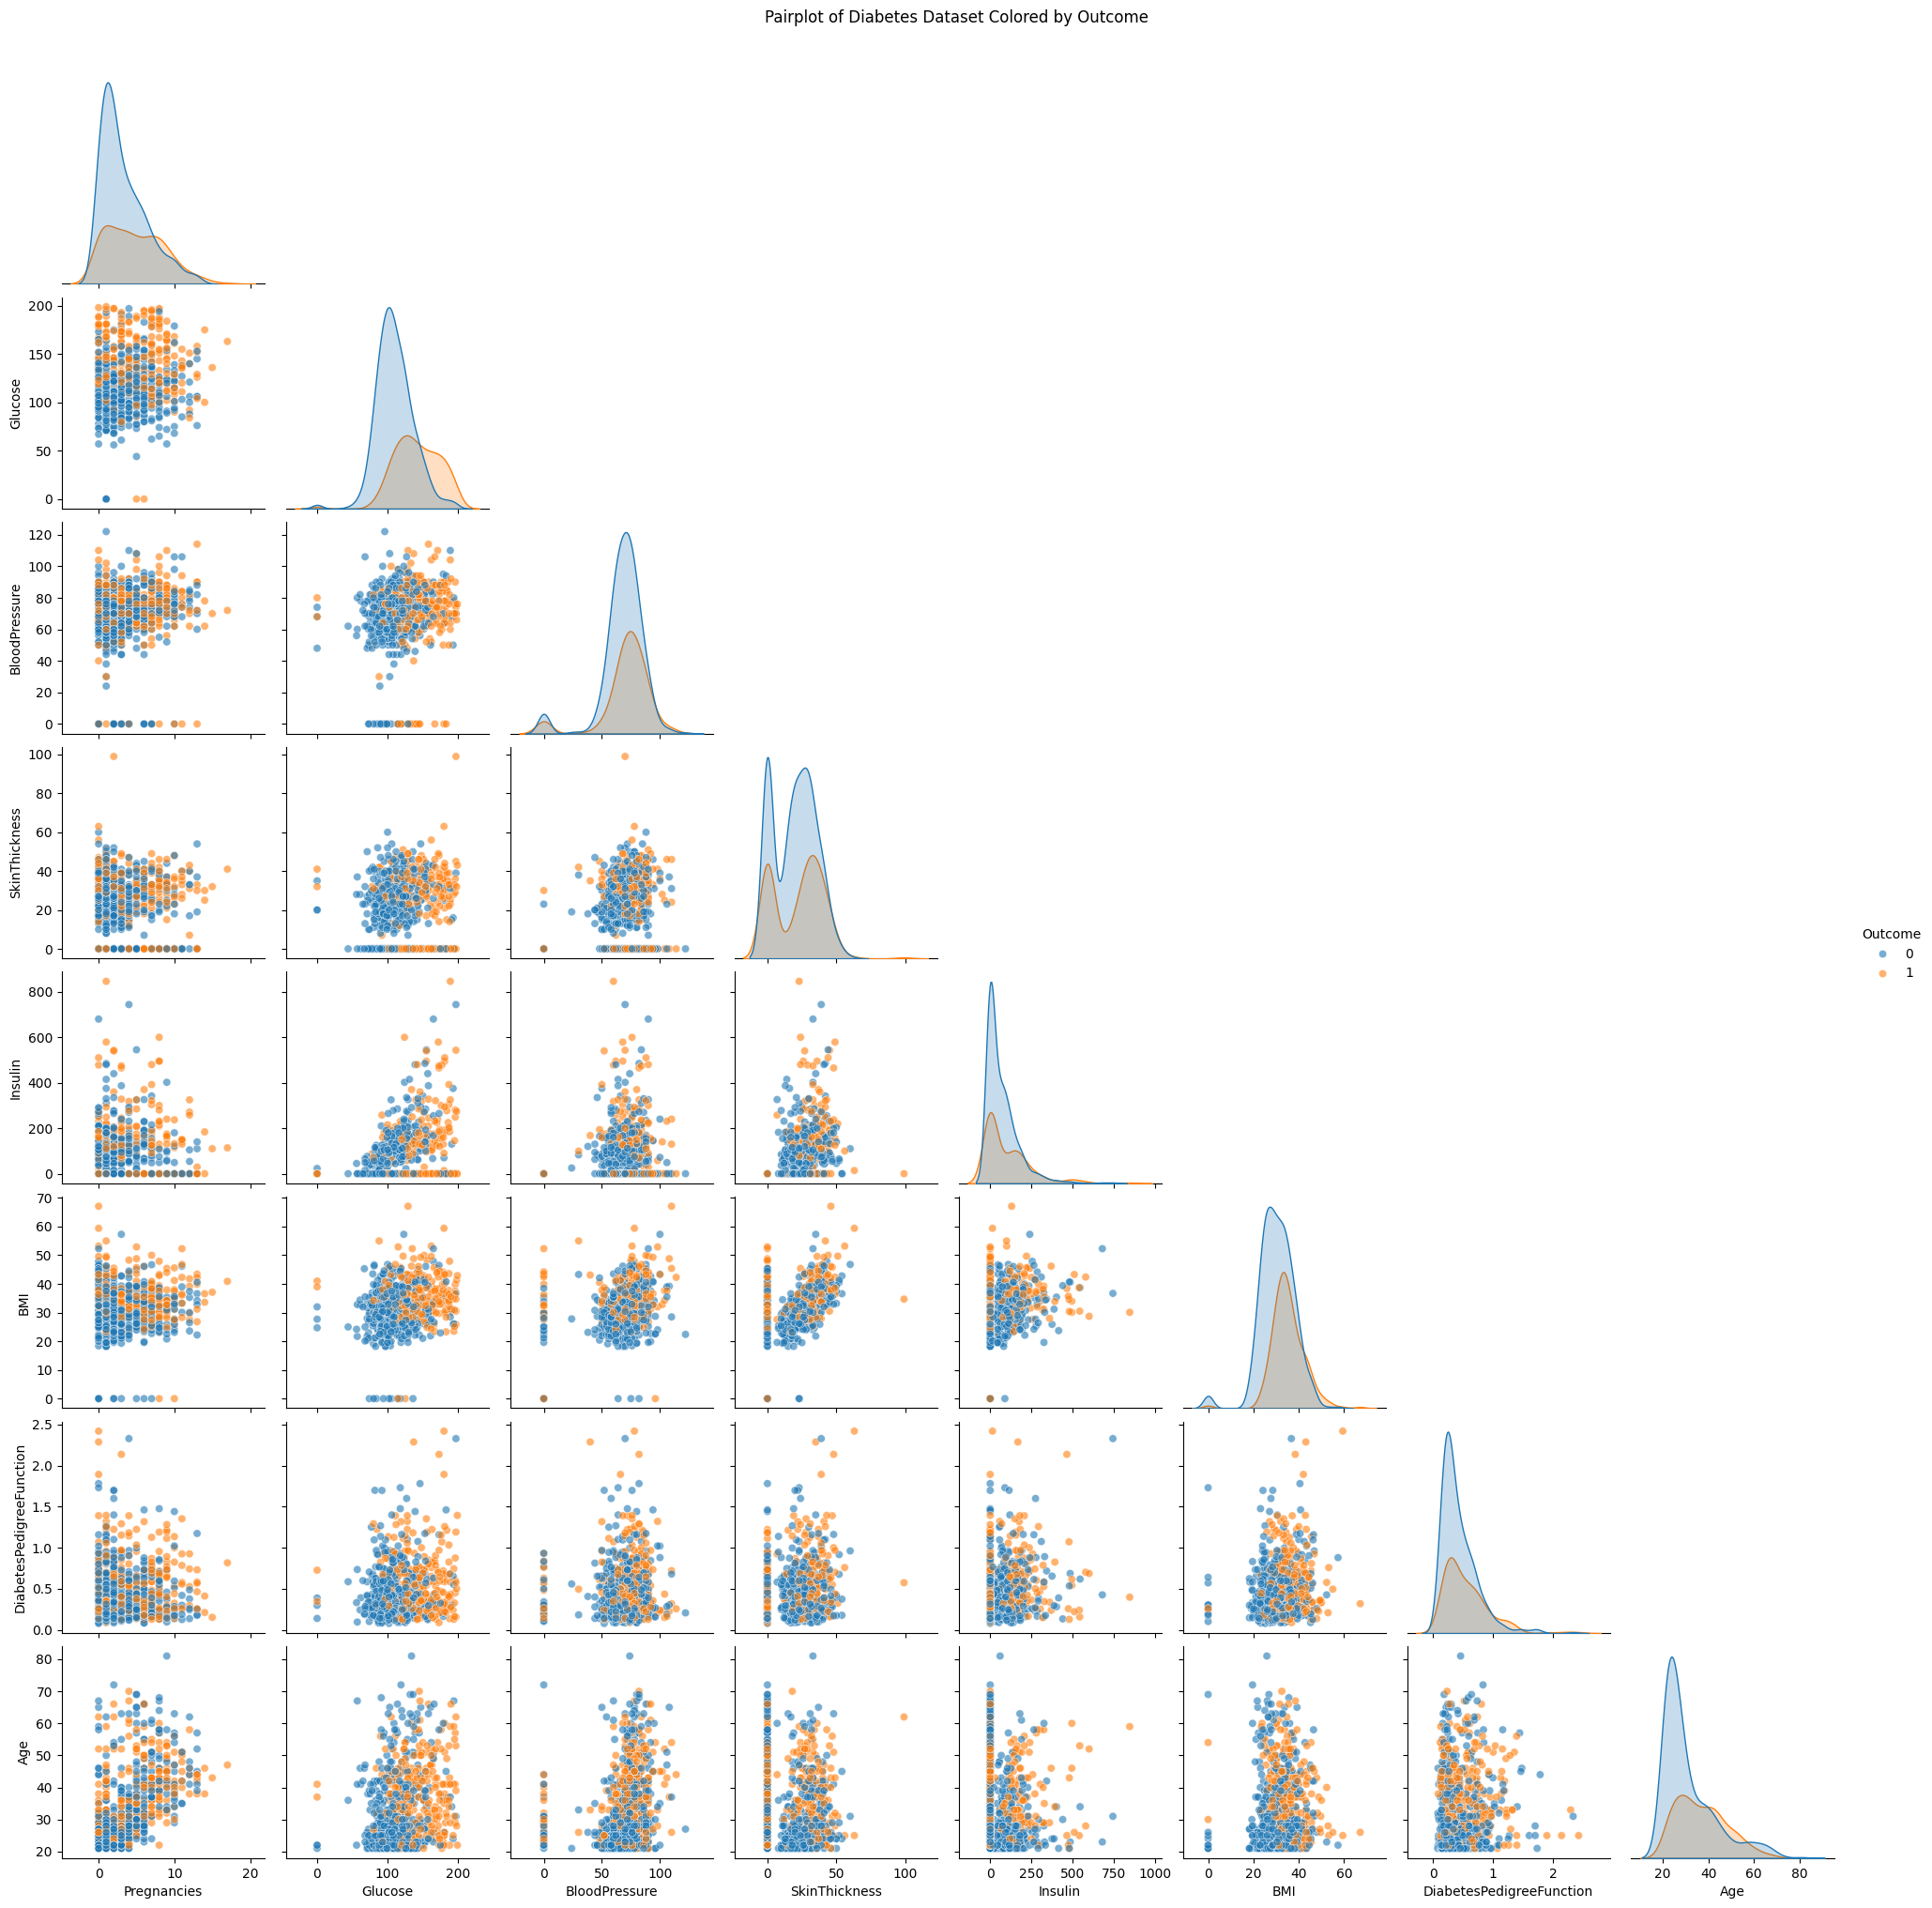

In [7]:
# Step 2: Import libraries and load data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('diabetes.csv')

# Step 3: Plot histogram of Glucose
plt.figure(figsize=(8, 5))
sns.histplot(df['Glucose'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Generate seaborn pairplot colored by Outcome
sns.pairplot(df, hue='Outcome', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Diabetes Dataset Colored by Outcome', y=1.02)
plt.show()
